# Implementación de Algoritmo k-NN para Dataset IRIS

## Importación de librerías y configuración inicial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# configuración de rutas
DATOS = './iris.csv'
OUT = './out'

# crear directorio para guardar las visualizaciones
os.makedirs(OUT, exist_ok=True)

## Carga del conjunto de datos IRIS

In [2]:
# cargar datos desde archivo CSV
dataset_iris = pd.read_csv(DATOS, header=None)
dataset_iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# incluir columna de identificación
dataset_iris.insert(0, 'Id', range(1, len(dataset_iris) + 1))

## Exploración inicial del dataset

Analizaremos las características principales de nuestro conjunto de datos.

In [3]:
# mostrar primeras observaciones
dataset_iris.head()
# mostrar últimas observaciones  
dataset_iris.tail()
# información general del dataset
dataset_iris.info()
# estadísticas descriptivas
dataset_iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Limpieza y preparación de datos

In [4]:
# remover la columna Id que no es necesaria para el análisis
df = dataset_iris.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Análisis Visual de las Características

Comenzaremos analizando las medidas de los pétalos.

### Análisis de características de pétalos

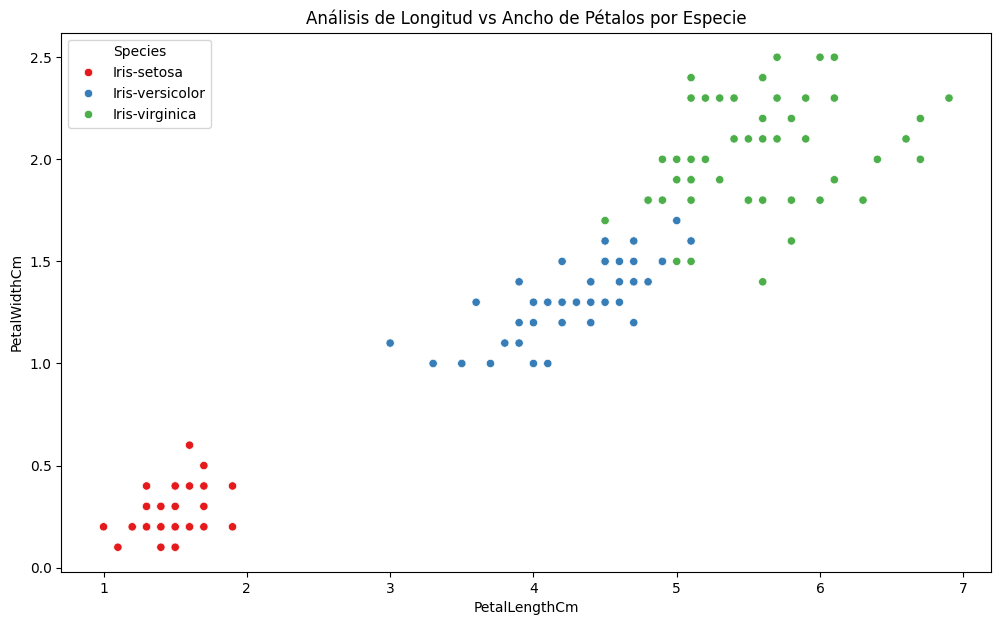

In [5]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='Set1')
plt.title('Análisis de Longitud vs Ancho de Pétalos por Especie')
plt.savefig(f'{OUT}/analisis_petalos.png', dpi=300, bbox_inches='tight')
plt.show()

### Análisis de características de sépalos

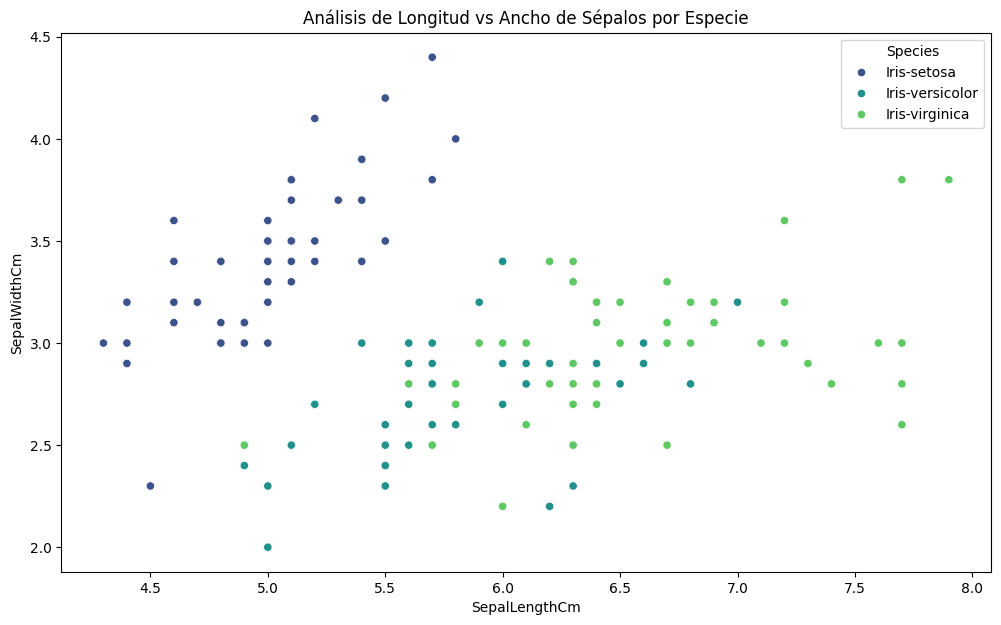

In [6]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='viridis')
plt.title('Análisis de Longitud vs Ancho de Sépalos por Especie')
plt.savefig(f'{OUT}/analisis_sepalos.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualización completa de relaciones entre variables

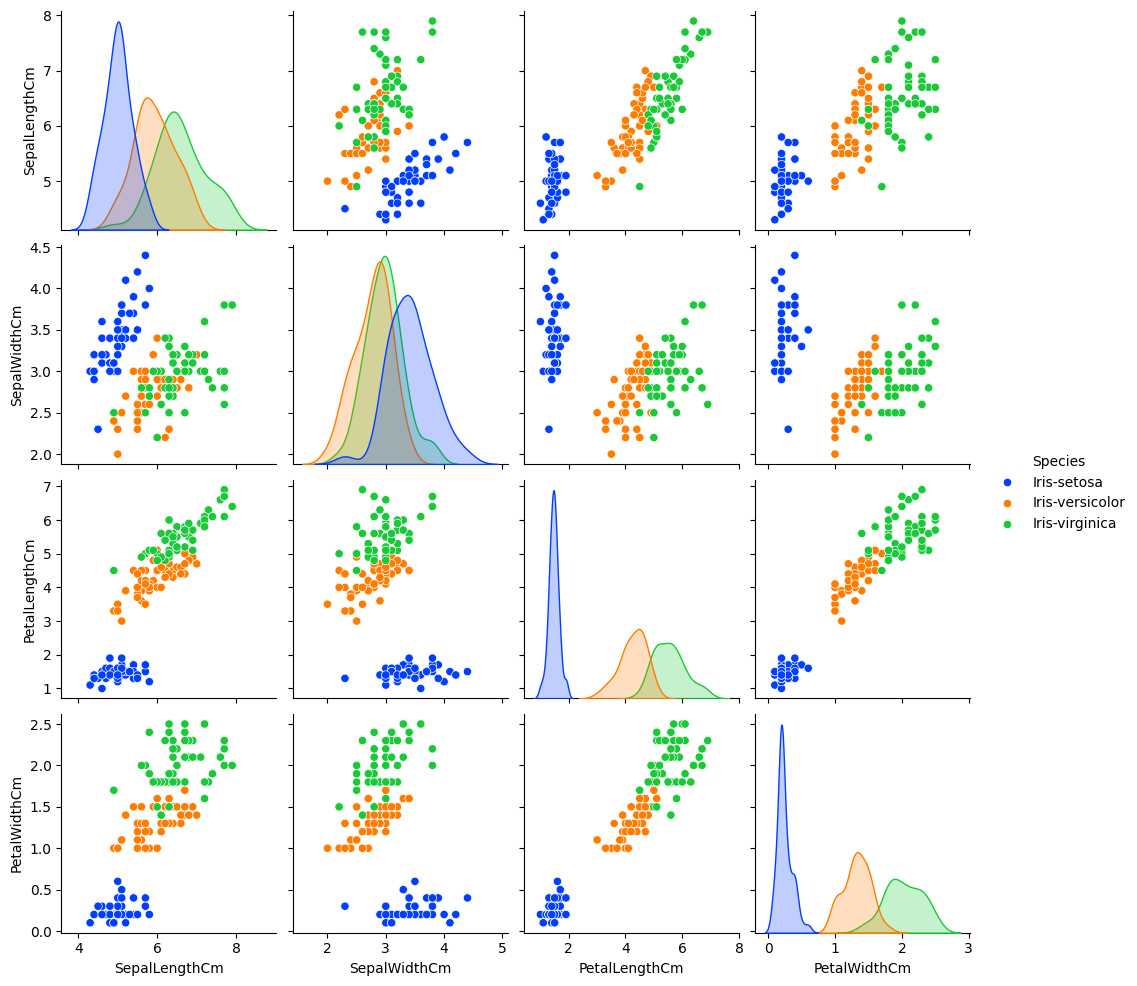

In [7]:
# matriz de correlación entre todas las variables
grafico_pares = sns.pairplot(df, hue='Species', palette='bright')
grafico_pares.savefig(f'{OUT}/matriz_correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

## Preparación de datos para el modelo

Separamos las variables predictoras de la variable objetivo.

### Definición de variables predictoras

In [8]:
# definir matriz de características (features)
caracteristicas = df.drop('Species', axis=1)
caracteristicas.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Definición de variable objetivo

In [9]:
# definir variable objetivo (target)
objetivo = df['Species']
objetivo.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### División del conjunto de datos

Crearemos conjuntos de entrenamiento y prueba para evaluar nuestro modelo.

In [10]:
from sklearn.model_selection import train_test_split

# dividir datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    caracteristicas, objetivo, test_size=0.2, random_state=123
)

print(f"Datos de entrenamiento: {len(X_entrenamiento)} observaciones")
print(f"Datos de prueba: {len(X_prueba)} observaciones")
print("\nMuestra de datos de entrenamiento:")
print(X_entrenamiento.head())
print("\nMuestra de datos de prueba:")
print(X_prueba.head())

Datos de entrenamiento: 120 observaciones
Datos de prueba: 30 observaciones

Muestra de datos de entrenamiento:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
130            7.4           2.8            6.1           1.9
119            6.0           2.2            5.0           1.5
29             4.7           3.2            1.6           0.2
0              5.1           3.5            1.4           0.2
62             6.0           2.2            4.0           1.0

Muestra de datos de prueba:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
72             6.3           2.5            4.9           1.5
112            6.8           3.0            5.5           2.1
132            6.4           2.8            5.6           2.2
88             5.6           3.0            4.1           1.3
37             4.9           3.1            1.5           0.1


## Implementación del modelo k-NN

Entrenaremos nuestro clasificador de k-vecinos más cercanos.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# crear y entrenar modelo k-NN con k=5
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_entrenamiento, y_entrenamiento)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Generar predicciones

In [12]:
# realizar predicciones sobre conjunto de prueba
predicciones = modelo_knn.predict(X_prueba)
predicciones

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

## Evaluación del rendimiento del modelo

In [13]:
# calcular exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_prueba, predicciones)
print("Exactitud del modelo k-NN:", exactitud)

Exactitud del modelo k-NN: 0.9666666666666667


## Visualización de la Matriz de Confusión

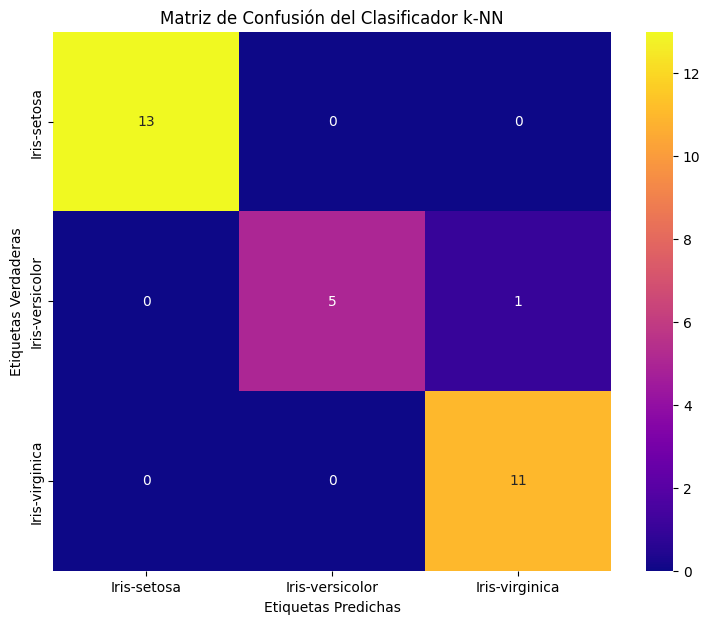

In [14]:
from sklearn.metrics import confusion_matrix

# generar matriz de confusión
matriz_confusion = confusion_matrix(y_prueba, predicciones)

plt.figure(figsize=(9, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='d', 
            xticklabels=df['Species'].unique(), 
            yticklabels=df['Species'].unique(), 
            cmap='plasma')
plt.title('Matriz de Confusión del Clasificador k-NN')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.savefig(f'{OUT}/matriz_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

## Optimización del parámetro k

Evaluaremos diferentes valores de k para encontrar el óptimo.

Evaluación de exactitud para diferentes valores de k:
k=1: 0.9000 (90.0%)
k=2: 0.9000 (90.0%)
k=3: 0.9667 (96.7%)
k=4: 0.9667 (96.7%)
k=5: 0.9667 (96.7%)
k=6: 0.9000 (90.0%)
k=7: 0.9333 (93.3%)
k=8: 0.9667 (96.7%)
k=9: 0.9667 (96.7%)
k=10: 0.9333 (93.3%)
k=11: 0.9667 (96.7%)
k=12: 0.9667 (96.7%)
k=13: 0.9667 (96.7%)
k=14: 0.9667 (96.7%)
k=15: 0.9667 (96.7%)
k=16: 0.9667 (96.7%)
k=17: 0.9667 (96.7%)
k=18: 0.9000 (90.0%)
k=19: 0.9333 (93.3%)


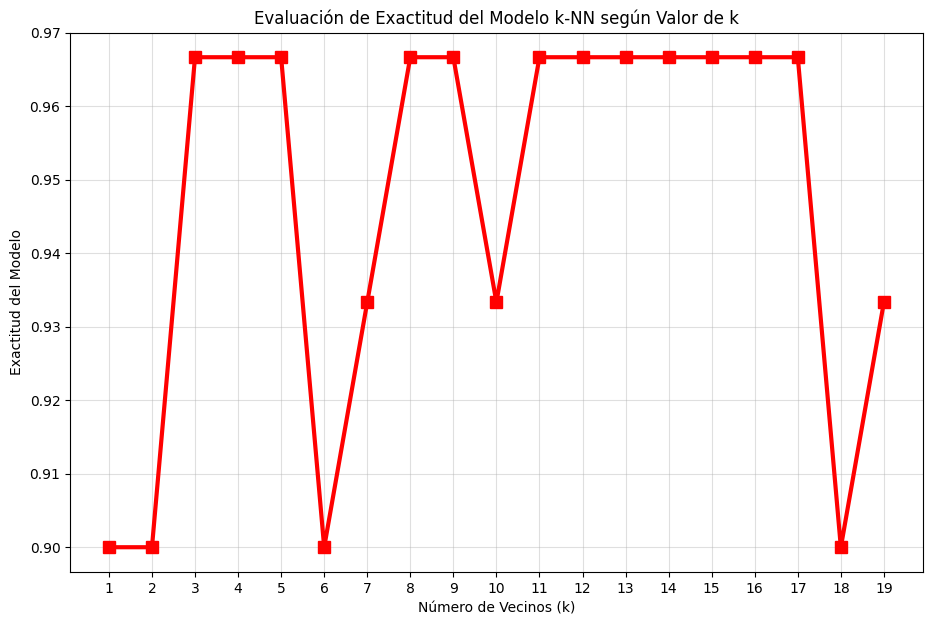


Valor óptimo de k: 3 con exactitud de 0.9667 (96.7%)


In [15]:
# evaluar diferentes valores de k
valores_k = range(1, 20)
exactitudes = []

print("Evaluación de exactitud para diferentes valores de k:")
for k in valores_k:
    clasificador = KNeighborsClassifier(n_neighbors=k)
    clasificador.fit(X_entrenamiento, y_entrenamiento)
    pred_k = clasificador.predict(X_prueba)
    exactitud_k = accuracy_score(y_prueba, pred_k)
    exactitudes.append(exactitud_k)
    print(f"k={k}: {exactitud_k:.4f} ({exactitud_k*100:.1f}%)")

# visualizar resultados
plt.figure(figsize=(11, 7))
plt.plot(valores_k, exactitudes, marker='s', linewidth=3, markersize=8, color='red')
plt.title('Evaluación de Exactitud del Modelo k-NN según Valor de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Exactitud del Modelo')
plt.grid(True, alpha=0.4)
plt.xticks(valores_k)
plt.savefig(f'{OUT}/optimizacion_k.png', dpi=300, bbox_inches='tight')
plt.show()

# identificar mejor valor de k
mejor_k = valores_k[exactitudes.index(max(exactitudes))]
mejor_exactitud = max(exactitudes)
print(f"\nValor óptimo de k: {mejor_k} con exactitud de {mejor_exactitud:.4f} ({mejor_exactitud*100:.1f}%)")